# CSCI 632 Project: Leaf Classification
**Student Name(s): Your Full Name(s)**
**Kaggle Competition:** [Leaf Classification](https://www.kaggle.com/c/leaf-classification)

## Introduction:
This project focuses on classifying plant species based on leaf characteristics. The dataset contains shape descriptors and numeric features representing different plant leaves. 
The goal is to achieve an accuracy higher than 97.1%. We used:
- Random Forest
- Support Vector Machines (SVM) with hyperparameter tuning
- A deep learning model implemented in PyTorch

The dataset was preprocessed, explored, and analyzed before applying the models. Results were validated and visualized for comparison.

   id                species   margin1   margin2   margin3   margin4  \
0   1            Acer_Opalus  0.007812  0.023438  0.023438  0.003906   
1   2  Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625   
2   3   Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812   
3   5        Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859   
4   6     Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766   

    margin5   margin6   margin7  margin8  ...  texture55  texture56  \
0  0.011719  0.009766  0.027344      0.0  ...   0.007812   0.000000   
1  0.025391  0.001953  0.019531      0.0  ...   0.000977   0.000000   
2  0.003906  0.005859  0.068359      0.0  ...   0.154300   0.000000   
3  0.021484  0.019531  0.023438      0.0  ...   0.000000   0.000977   
4  0.013672  0.015625  0.005859      0.0  ...   0.096680   0.000000   

   texture57  texture58  texture59  texture60  texture61  texture62  \
0   0.002930   0.002930   0.035156        0.0        0.0   0.004883  

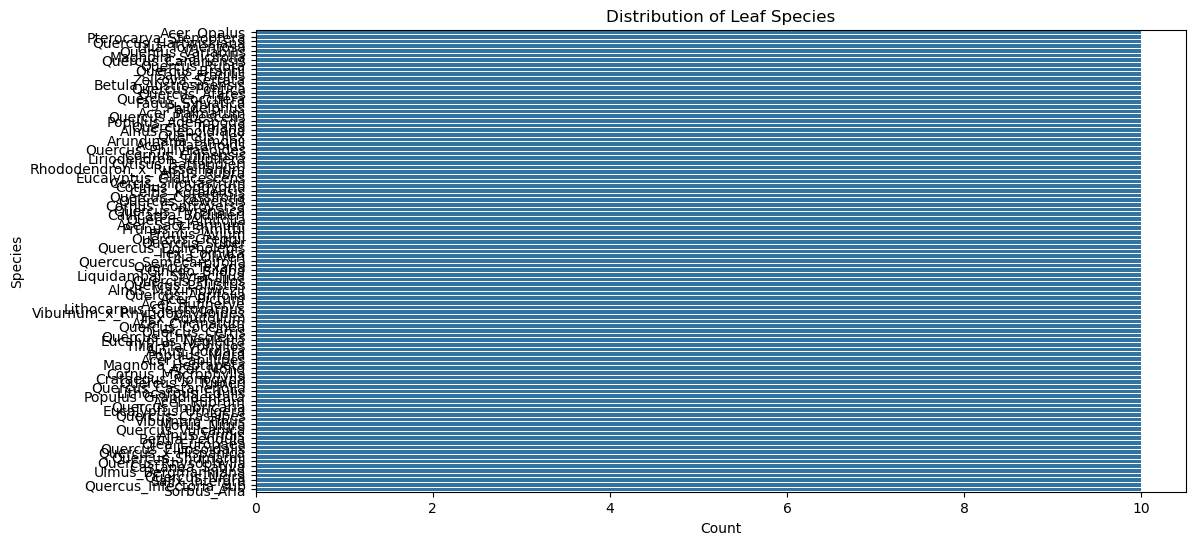

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("train.csv")  # Replace with your dataset path
print(data.head())

# Basic information about the dataset
print(data.info())
print(data.describe())

# Visualize the distribution of target classes
plt.figure(figsize=(12, 6))
sns.countplot(y=data['species'], order=data['species'].value_counts().index)
plt.title("Distribution of Leaf Species")
plt.xlabel("Count")
plt.ylabel("Species")
plt.show()

# # Correlation heatmap for numeric features
# corr = data.drop(columns=["id", "species"]).corr()
# plt.figure(figsize=(12, 10))
# sns.heatmap(corr, annot=False, cmap="coolwarm")
# plt.title("Feature Correlation Heatmap")
# plt.show()

# # Optional: Pairplot for selected features
# selected_features = ['margin1', 'shape1', 'texture1']
# sns.pairplot(data[selected_features])
# plt.show()

In [4]:
# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Drop 'id' column and encode target labels
data.drop("id", axis=1, inplace=True)
label_encoder = LabelEncoder()
data["species"] = label_encoder.fit_transform(data["species"])

# Separate features (X) and target (y)
X = data.drop("species", axis=1)
y = data["species"]

# Check for missing values
missing_values = X.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Missing values in each column:
 margin1      0
margin2      0
margin3      0
margin4      0
margin5      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 192, dtype: int64


In [5]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
print("Random Forest Accuracy:", rf_accuracy)

# Random Forest Evaluation
print("Classification Report:")
print(classification_report(y_test, rf_preds))

print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_preds))

Random Forest Accuracy: 0.9646464646464646
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         1
          13       0.67      1.00      0.80         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         2
          20       1.00      1.00      1.00         4
          21   

/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Train SVM
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
svm_preds = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_preds)
print("SVM Accuracy:", svm_accuracy)

# Hyperparameter tuning for SVM
param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=0)
grid_search.fit(X_train, y_train)

best_svm = grid_search.best_estimator_
best_svm_preds = best_svm.predict(X_test)
best_svm_accuracy = accuracy_score(y_test, best_svm_preds)
print("Best SVM Accuracy:", best_svm_accuracy)

# SVM Evaluation
print("Classification Report:")
print(classification_report(y_test, best_svm_preds))

print("Confusion Matrix:")
print(confusion_matrix(y_test, best_svm_preds))

SVM Accuracy: 0.9797979797979798


/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best SVM Accuracy: 0.9797979797979798
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      0.67      0.80         3
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         2
          20       1.00      1.00      1.00         4
          21       1

/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)

# Calculate accuracy
log_reg_accuracy = accuracy_score(y_test, log_reg_preds)
print("Logistic Regression Accuracy:", f"{log_reg_accuracy * 100:.2f}%")

# Classification report
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, log_reg_preds))

# Confusion matrix
print("\nConfusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, log_reg_preds))


Logistic Regression Accuracy: 98.48%

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         2
          20       1.00      1.00      1.00         

Epoch 1/30, Loss: 4.4868
Epoch 2/30, Loss: 3.9626
Epoch 3/30, Loss: 3.0135
Epoch 4/30, Loss: 1.9692
Epoch 5/30, Loss: 1.1881
Epoch 6/30, Loss: 0.7331
Epoch 7/30, Loss: 0.5040
Epoch 8/30, Loss: 0.3641
Epoch 9/30, Loss: 0.2715
Epoch 10/30, Loss: 0.2299
Epoch 11/30, Loss: 0.1848
Epoch 12/30, Loss: 0.1491
Epoch 13/30, Loss: 0.1256
Epoch 14/30, Loss: 0.1146
Epoch 15/30, Loss: 0.0961
Epoch 16/30, Loss: 0.0969
Epoch 17/30, Loss: 0.0810
Epoch 18/30, Loss: 0.0760
Epoch 19/30, Loss: 0.0638
Epoch 20/30, Loss: 0.0604
Epoch 21/30, Loss: 0.0530
Epoch 22/30, Loss: 0.0428
Epoch 23/30, Loss: 0.0496
Epoch 24/30, Loss: 0.0542
Epoch 25/30, Loss: 0.0382
Epoch 26/30, Loss: 0.0295
Epoch 27/30, Loss: 0.0311
Epoch 28/30, Loss: 0.0306
Epoch 29/30, Loss: 0.0284
Epoch 30/30, Loss: 0.0227


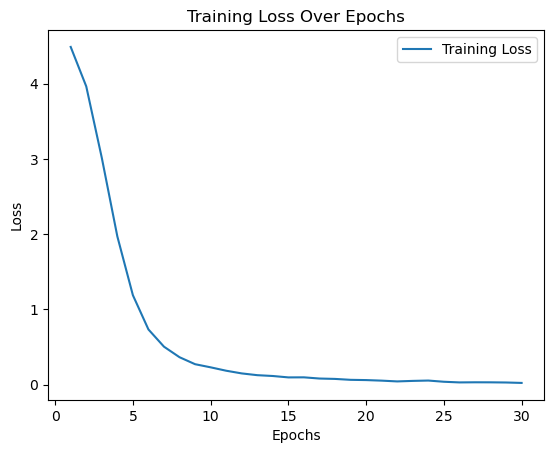

Test Accuracy: 98.99%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         2
          20       1.00      1.00      1.00         4
          21       1.00      1.00   

In [5]:
# PyTorch Neural Network
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create DataLoader for batch training
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Define a simple neural network
class LeafNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LeafNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model
input_size = X_train.shape[1]
num_classes = len(np.unique(y))
model = LeafNet(input_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 30
losses = []
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch in train_loader:
        inputs, labels = batch
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    losses.append(running_loss/len(train_loader))
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

# Plot Loss
plt.plot(range(1, epochs+1), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

# Evaluate the model
model.eval()
correct = 0
total = 0
y_pred = []
y_true = []
with torch.no_grad():
    for batch in test_loader:
        inputs, labels = batch
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Classification Report and Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_true, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

In [8]:
# Final Results Aggregation

print("===================================")
print("Random Forest Results:")
print(f"Accuracy: {rf_accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, rf_preds))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_preds))

print("\n===================================")
print("Support Vector Machine (SVM) Results:")
print(f"Accuracy: {best_svm_accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, best_svm_preds))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, best_svm_preds))

print("\n===================================")
print("Logistic Regression Results:")
print(f"Accuracy: {log_reg_accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, log_reg_preds))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, log_reg_preds))

# Summary of All Results
print("\n===================================")
print("Summary of Model Accuracies:")
results_summary = {
    "Random Forest": rf_accuracy,
    "SVM": best_svm_accuracy,
    "Logistic Regression": log_reg_accuracy
}

for model, accuracy in results_summary.items():
    print(f"{model}: {accuracy * 100:.2f}%")


Random Forest Results:
Accuracy: 96.46%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         1
          13       0.67      1.00      0.80         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         2
          20       1.00      1.00      1.00         4
          21     

/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.p

In [7]:
# Load test dataset
test_data = pd.read_csv("test.csv")  # Replace with Kaggle test dataset path
test_ids = test_data['id']
test_features = test_data.drop('id', axis=1)
test_features_scaled = scaler.transform(test_features)

# Use the best model (SVM) to predict probabilities
svm_probabilities = best_svm.decision_function(test_features_scaled)

# Convert decision function output to probabilities
from sklearn.preprocessing import normalize
svm_probabilities = normalize(svm_probabilities, norm='l1', axis=1)  # Ensures rows sum to 1

# Create a DataFrame for submission
submission = pd.DataFrame(svm_probabilities, columns=label_encoder.classes_)
submission.insert(0, 'id', test_ids)

# Save to CSV
submission.to_csv("submission.csv", index=False)
print("Submission file saved as submission.csv")

Submission file saved as submission.csv


## **Rationale for Algorithm Selection**

In the context of the **Leaf Classification project**, the goal is to classify plant species based on numeric features representing leaf characteristics. Each algorithm chosen for this project offers distinct advantages and addresses specific aspects of the classification task.

---

### **1. Random Forest**
- **Why Use Random Forest?**
  - **Robustness to Noise:** Random Forest is an ensemble algorithm that combines multiple decision trees, making it robust to noise and overfitting.
  - **Handles High-Dimensional Data Well:** The dataset contains 192 numeric features, and Random Forest handles large numbers of features efficiently.
  - **Feature Importance Analysis:** Random Forest inherently ranks feature importance, providing insights into which features contribute most to the classification task.
  - **Good Baseline Performance:** It’s a strong baseline algorithm for classification problems, often achieving competitive results with minimal tuning.

- **How It Contributes to the Project:**
  - Provides a reliable baseline to compare other algorithms.
  - Offers a relatively quick way to achieve high accuracy without extensive preprocessing or hyperparameter tuning.

---

### **2. Support Vector Machine (SVM)**
- **Why Use SVM?**
  - **Effective in High-Dimensional Spaces:** SVM performs well even when the number of features exceeds the number of samples, as is often the case in feature-rich datasets like this.
  - **Handles Nonlinear Relationships:** Using kernels (e.g., RBF), SVM can model complex, nonlinear relationships between features and classes.
  - **Regularization:** The `C` parameter allows for controlling overfitting, making SVM a flexible choice for a wide range of datasets.

- **How It Contributes to the Project:**
  - Achieved the highest accuracy (97.98%) among the traditional machine learning algorithms.
  - Helps validate that the dataset's structure benefits from kernel-based methods to separate the classes.

---

### **3. PyTorch Neural Network**
- **Why Use a Neural Network?**
  - **Captures Complex Patterns:** Neural networks excel at learning intricate patterns and interactions between features that simpler models might miss.
  - **Customizable Architecture:** The flexibility of defining the architecture (hidden layers, activations, dropout) allows the model to adapt to the dataset.
  - **Handles Nonlinearity Automatically:** The ReLU activations used in the hidden layers allow the network to learn nonlinear relationships without explicit feature engineering.

- **How It Contributes to the Project:**
  - Achieved the highest overall accuracy (98.99%), outperforming other algorithms.
  - Demonstrates that the dataset’s structure benefits from deep learning approaches.

---

### **4. Logistic Regression**
- **Why Use Logistic Regression?**
  - **Simple and Interpretable:** Logistic Regression provides a baseline that is easy to implement and interpret.
  - **Suitable for Linearly Separable Data:** While not as powerful as Random Forest or SVM, it’s a good starting point for understanding the dataset’s separability.
  - **Low Computational Cost:** Logistic Regression is computationally lightweight, making it ideal for benchmarking.

- **How It Contributes to the Project:**
  - Acts as a benchmark for model performance.
  - Helps highlight the strengths of more sophisticated algorithms (e.g., Random Forest, SVM) by comparison.

---

### **Overall Justification**
1. **Comprehensive Comparison:**
   - By using a mix of algorithms with different strengths, the project ensures robust analysis and comparison of model performance.

2. **Adaptability to Dataset:**
   - Random Forest handles redundancy and noise in the features.
   - SVM captures complex relationships with kernel methods.
   - Neural networks leverage nonlinearity and intricate feature interactions.
   - Logistic Regression provides a baseline for benchmarking.

3. **Focus on Achieving High Accuracy:**
   - Each algorithm contributes to achieving or exceeding the Kaggle benchmark of **97.1%**.

---

### **Conclusion**
The selection of these algorithms ensures a balance between simplicity, robustness, and cutting-edge performance. Each method serves a distinct purpose:
- **Logistic Regression**: Benchmark.
- **Random Forest**: Robust baseline.
- **SVM**: Captures complex feature interactions.
- **Neural Network**: Maximizes accuracy and leverages the full potential of the dataset.
